### macro mAP retrain vs BirdNET for different dataframes

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import average_precision_score

In [2]:
# Paths to the CSV files
true_labels_path = ('/mnt/d/retraining_BirdNET_2025/model_test/input_ready/one-hot-encoded_validation1.csv')
predictions_path = ('/mnt/d/retraining_BirdNET_2025/model_test/results/model_0_0129_s1_t0.01_analyzed5khz/m0_predicted_labels.csv')

In [3]:
# Load the DataFrames
true_labels_df = pd.read_csv(true_labels_path)
predictions_df = pd.read_csv(predictions_path)

In [4]:
# Extract label data, assuming columns are ordered and named the same beyond the first three columns
# The first three columns are assumed to be 'file', 'start_time', 'end_time' which are not part of the labels
true_labels = true_labels_df.iloc[:, 3:].values
predictions = predictions_df.iloc[:, 3:].values

In [5]:
# Calculate the macro mean average precision
macro_mAP = average_precision_score(true_labels, predictions, average='macro')

print(f'Macro Mean Average Precision: {macro_mAP}')

Macro Mean Average Precision: 0.5353953101101304


### Calculate precision-recall for each class and average precision over all classes

In [7]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
# Assuming you already have `true_labels` and `predictions` (e.g., probabilities or decision function output)
n_classes = true_labels.shape[1]  # This should match the number of classes


# For each class, calculate precision, recall, and average precision
precision = dict()
recall = dict()
average_precision = dict()

# Loop through each class
for i in range(n_classes):
    # Check if there are any positive samples for the current class
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predictions[:, i])
    average_precision[i] = average_precision_score(true_labels[:, i], predictions[:, i])

# Calculate macro-average precision-recall
precision["macro"], recall["macro"], _ = precision_recall_curve(true_labels.ravel(), predictions.ravel())
average_precision["macro"] = average_precision_score(true_labels, predictions, average="macro")

### Plot macro mean average precision recall curve

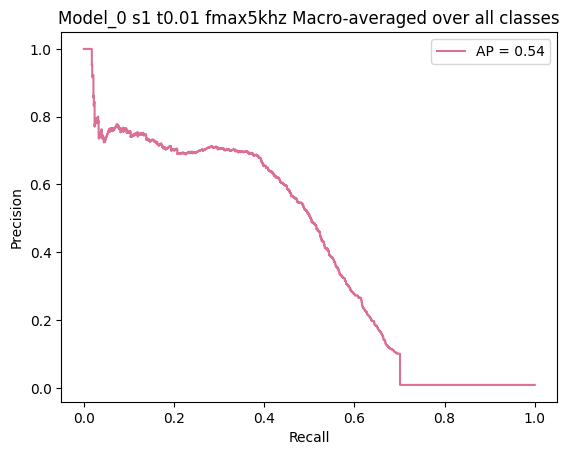

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

# Plot the precision-recall curve using the macro-average
display = PrecisionRecallDisplay(
    recall=recall["macro"],
    precision=precision["macro"],
    average_precision=average_precision["macro"],
    prevalence_pos_label=Counter(true_labels.ravel())[1] / true_labels.size,
)

# Customize line color (e.g., set to red)
display.plot(plot_chance_level=False, color='palevioletred')

# Move the legend inside the plot
plt.legend(loc="upper right")

plt.title("Model_0 s1 t0.01 fmax5khz Macro-averaged over all classes")

# Save the plot as PNG or JPG
plt.savefig('/mnt/d/retraining_BirdNET_2025/model_test/results/model_0_0129_s1_t0.01_analyzed5khz/m0_precision_recall.png', format='png', dpi=300)  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot

plt.show()

### Plot average precision for specific classes

In [9]:
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay


# Get the class names starting from column 4
class_names = true_labels_df.iloc[:, 3:].columns

class_names

Index(['Barn Owl', 'Rusty-barred Owl_song', 'Rusty-barred Owl_call',
       'Rusty-barred Owl_call1', 'Ferruginous Pygmy-Owl',
       'Tropical Screech-Owl', 'Black-capped Screech-Owl',
       'Long-tufted Screech-Owl', 'Buff-fronted Owl', 'Rufous Nightjar',
       'Silky-tailed Nightjar', 'Stygian Owl_song', 'Stygian Owl_call',
       'Striped Owl_song', 'Striped Owl_call', 'Burrowing Owl_call',
       'Burrowing Owl_song', 'Rufous-capped Motmot', 'Black-banded Owl',
       'Mottled Owl_song', 'Mottled Owl_call', 'Brown Tinamou',
       'Ocellated Poorwill', 'Long-tailed Potoo', 'Common Potoo',
       'Common Pauraque', 'Short-tailed Nighthawk', 'Spot-winged Wood-Quail',
       'Tawny-browed Owl', 'Little Nightjar'],
      dtype='object')

### Frog type Owls

/tmp/ipykernel_2538/3892642715.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 1, 0.75, 2])


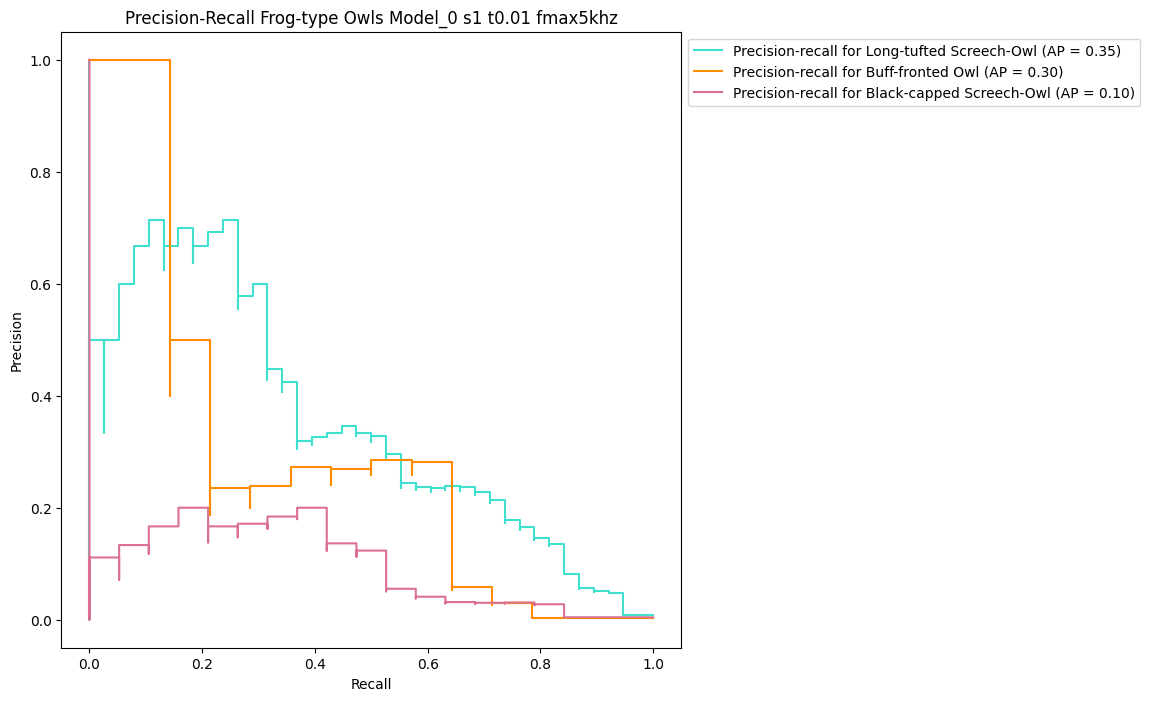

In [10]:
# Specify the class indices you want to plot
selected_class_names = ['Long-tufted Screech-Owl','Buff-fronted Owl','Black-capped Screech-Owl']

# Get the corresponding indices for the selected class names
selected_classes = [list(class_names).index(class_name) for class_name in selected_class_names]

# Setup plot details
colors = cycle(["turquoise", "darkorange","palevioletred"])

# Create the plot
_, ax = plt.subplots(figsize=(8, 8))

# Plot precision-recall curve for each selected class
for class_name, class_idx, color in zip(selected_class_names, selected_classes, colors):
    display = PrecisionRecallDisplay(
        recall=recall[class_idx],
        precision=precision[class_idx],
        average_precision=average_precision[class_idx],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# Add title and legend


ax.set_title("Precision-Recall Frog-type Owls Model_0 s1 t0.01 fmax5khz")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust location to the right of the plot

# Adjust layout to make room for the legend
plt.tight_layout(rect=[1, 1, 0.75, 2]) 
# Save the plot as PNG or JPG
plt.savefig('/mnt/d/retraining_BirdNET_2025/model_test/results/model_0_0129_s1_t0.01_analyzed5khz/frog-type-owls_precision_recall_curve.png', format='png', dpi=300, bbox_inches='tight')  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot


plt.show()

### Low pitched Owls

/tmp/ipykernel_2538/2029109237.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 1, 0.75, 2])


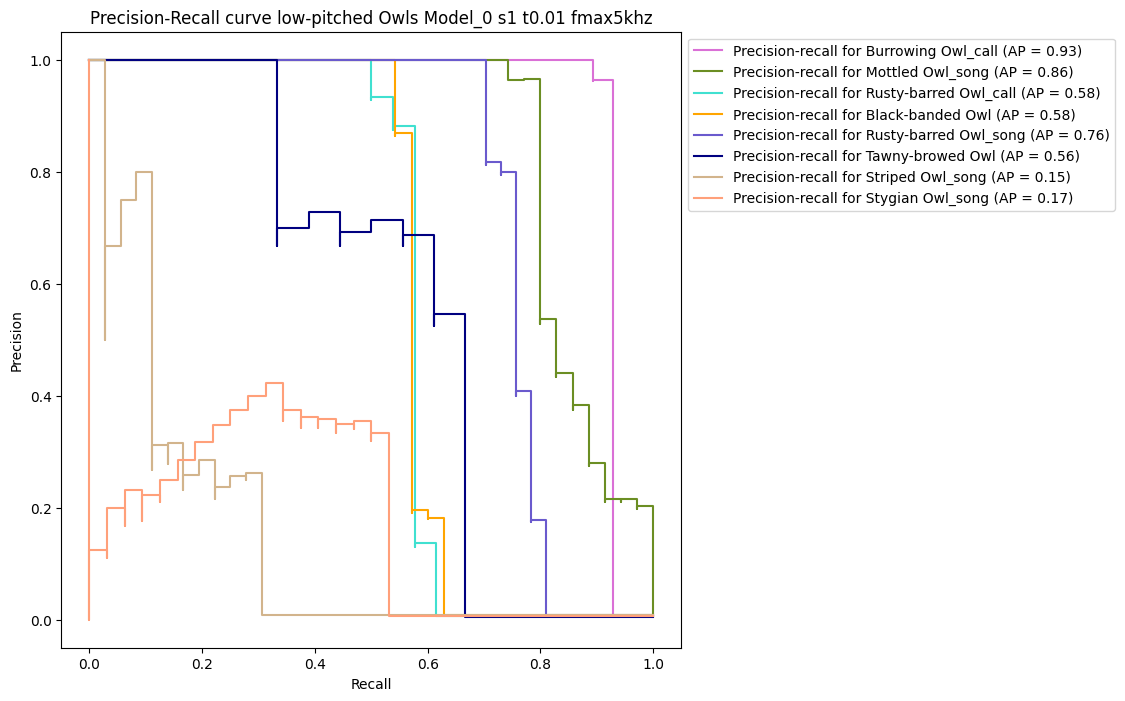

In [11]:
# Specify the class indices you want to plot
selected_class_names = ['Burrowing Owl_call','Mottled Owl_song', 'Rusty-barred Owl_call', 'Black-banded Owl',
                        'Rusty-barred Owl_song', 'Tawny-browed Owl','Striped Owl_song', 'Stygian Owl_song']

# Get the corresponding indices for the selected class names
selected_classes = [list(class_names).index(class_name) for class_name in selected_class_names]

# Setup plot details
colors = cycle(["orchid", "olivedrab", "turquoise", "orange", "slateblue", "navy",  "tan","lightsalmon"])

# Create the plot
_, ax = plt.subplots(figsize=(8, 8))

# Plot precision-recall curve for each selected class
for class_name, class_idx, color in zip(selected_class_names, selected_classes, colors):
    display = PrecisionRecallDisplay(
        recall=recall[class_idx],
        precision=precision[class_idx],
        average_precision=average_precision[class_idx],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# Add title and legend


ax.set_title("Precision-Recall curve low-pitched Owls Model_0 s1 t0.01 fmax5khz")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust location to the right of the plot

# Adjust layout to make room for the legend
plt.tight_layout(rect=[1, 1, 0.75, 2]) 
# Save the plot as PNG or JPG
plt.savefig('/mnt/d/retraining_BirdNET_2025/model_test/results/model_0_0129_s1_t0.01_analyzed5khz/low-pitched-owls_precision_recall_curve.png', format='png', dpi=300, bbox_inches='tight')  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot


plt.show()

### High pitched owls

/tmp/ipykernel_2538/597654670.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 1, 0.75, 2])


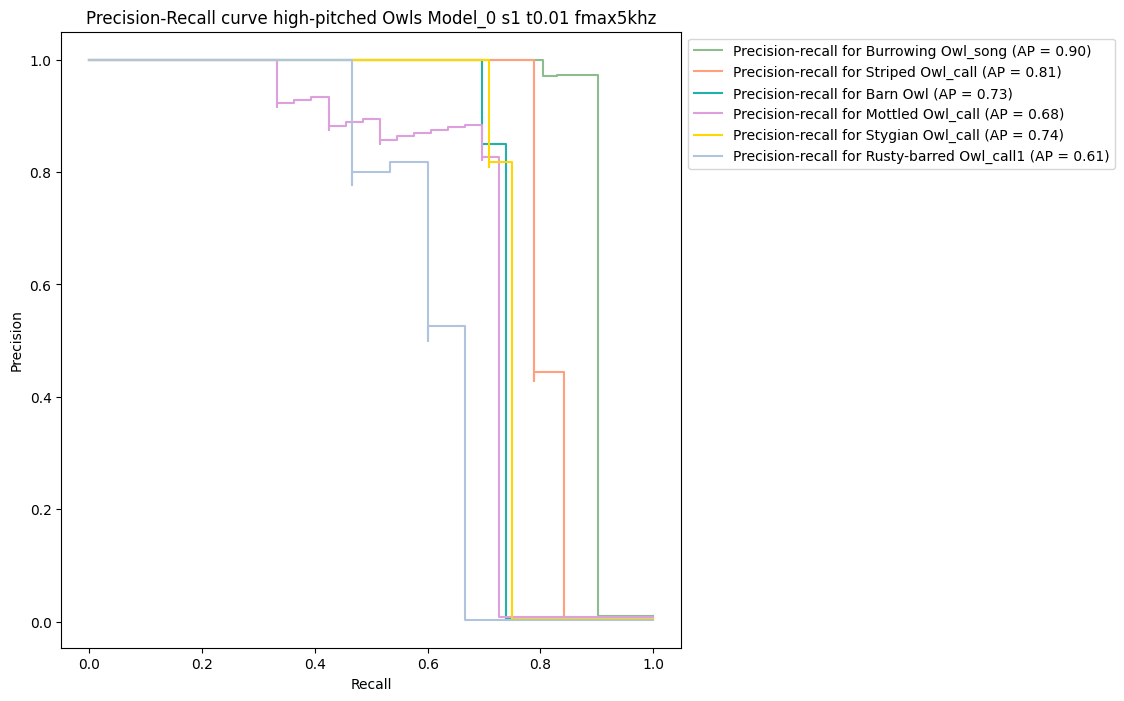

In [12]:
# Specify the class indices you want to plot
selected_class_names = ['Burrowing Owl_song', 'Striped Owl_call','Barn Owl', 'Mottled Owl_call',
                        'Stygian Owl_call','Rusty-barred Owl_call1']

# Get the corresponding indices for the selected class names
selected_classes = [list(class_names).index(class_name) for class_name in selected_class_names]

# Setup plot details
colors = cycle(["darkseagreen", "lightsalmon", "lightseagreen", "plum", "gold", "lightsteelblue"])

# Create the plot
_, ax = plt.subplots(figsize=(8, 8))

# Plot precision-recall curve for each selected class
for class_name, class_idx, color in zip(selected_class_names, selected_classes, colors):
    display = PrecisionRecallDisplay(
        recall=recall[class_idx],
        precision=precision[class_idx],
        average_precision=average_precision[class_idx],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# Add title and legend


ax.set_title("Precision-Recall curve high-pitched Owls Model_0 s1 t0.01 fmax5khz")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust location to the right of the plot

# Adjust layout to make room for the legend
plt.tight_layout(rect=[1, 1, 0.75, 2]) 
# Save the plot as PNG or JPG
plt.savefig('/mnt/d/retraining_BirdNET_2025/model_test/results/model_0_0129_s1_t0.01_analyzed5khz/high-pitch-owls_precision_recall_curve.png', format='png', dpi=300, bbox_inches='tight')  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot


plt.show()

#### Common Owls

/tmp/ipykernel_2538/400282256.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 1, 0.75, 2])


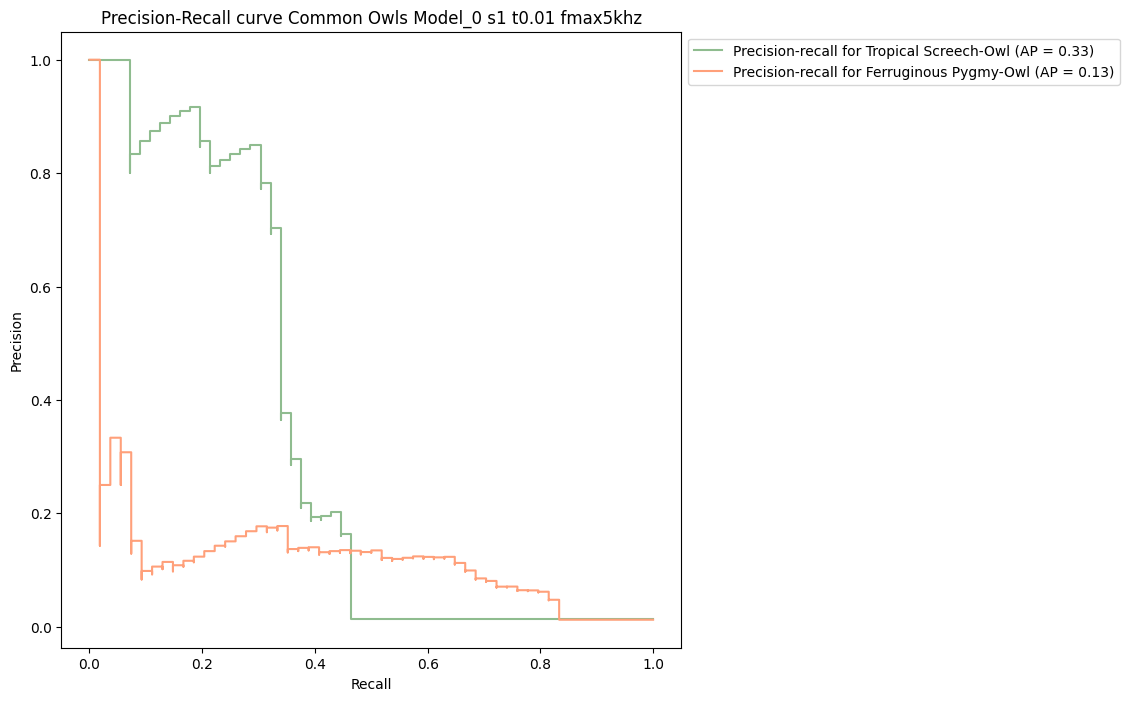

In [13]:
# Specify the class indices you want to plot
selected_class_names = ['Tropical Screech-Owl','Ferruginous Pygmy-Owl']

# Get the corresponding indices for the selected class names
selected_classes = [list(class_names).index(class_name) for class_name in selected_class_names]

# Setup plot details
colors = cycle(["darkseagreen", "lightsalmon"])

# Create the plot
_, ax = plt.subplots(figsize=(8, 8))

# Plot precision-recall curve for each selected class
for class_name, class_idx, color in zip(selected_class_names, selected_classes, colors):
    display = PrecisionRecallDisplay(
        recall=recall[class_idx],
        precision=precision[class_idx],
        average_precision=average_precision[class_idx],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# Add title and legend


ax.set_title("Precision-Recall curve Common Owls Model_0 s1 t0.01 fmax5khz")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust location to the right of the plot

# Adjust layout to make room for the legend
plt.tight_layout(rect=[1, 1, 0.75, 2]) 
# Save the plot as PNG or JPG
plt.savefig('/mnt/d/retraining_BirdNET_2025/model_test/results/model_0_0129_s1_t0.01_analyzed5khz/common-owls_precision_recall_curve.png', format='png', dpi=300, bbox_inches='tight')  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot


plt.show()

In [ ]:
# Specify the class indices you want to plot
selected_class_names = ['Little Nightjar','Rufous Nightjar','Long-tailed Potoo',
                        'Ocellated Poorwill','Short-tailed Nighthawk', 'Common Potoo',
                         'Common Pauraque','Silky-tailed Nightjar']

# Get the corresponding indices for the selected class names
selected_classes = [list(class_names).index(class_name) for class_name in selected_class_names]

# Setup plot details
colors = cycle(["darkseagreen", "lightsalmon", "lightseagreen", "orchid", "gold", "lightsteelblue", "olive", "yellowgreen","paleturquoise"])

# Create the plot
_, ax = plt.subplots(figsize=(8, 8))

# Plot precision-recall curve for each selected class
for class_name, class_idx, color in zip(selected_class_names, selected_classes, colors):
    display = PrecisionRecallDisplay(
        recall=recall[class_idx],
        precision=precision[class_idx],
        average_precision=average_precision[class_idx],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# Add title and legend


ax.set_title("Precision-Recall curve Caprimulgids_1st model")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust location to the right of the plot

# Adjust layout to make room for the legend
plt.tight_layout(rect=[1, 1, 0.75, 2]) 
# Save the plot as PNG or JPG
plt.savefig('/mnt/e/retraining_BirdNET/model_test/results/1st_model/1st_model_caprimulgids_precision_recall_curve.png', format='png', dpi=300, bbox_inches='tight')  # PNG format
# plt.savefig('precision_recall_curve.jpg', format='jpg', dpi=300)  # JPG format

# Show the plot


plt.show()